FloatSlider(value=0.08, continuous_update=False, description='Particles Radii Mean', layout=Layout(width='700p…

FloatSlider(value=0.005, continuous_update=False, description='Particles Radii Standard Deviation', layout=Lay…

FloatSlider(value=0.3, continuous_update=False, description='Rho', layout=Layout(width='700px'), max=1.0, min=…

FloatSlider(value=5000.0, continuous_update=False, description='Mean Number of Points', layout=Layout(width='7…

IntSlider(value=5, continuous_update=False, description='Precision boundary finder', layout=Layout(width='700p…

IntSlider(value=20, continuous_update=False, description='Number of Divisions', layout=Layout(width='700px'), …

IntSlider(value=5, continuous_update=False, description='Number of Iterations', layout=Layout(width='700px'), …

Checkbox(value=True, description='Add Particles', indent=False)

Checkbox(value=False, description='Show Anchor Points', indent=False)

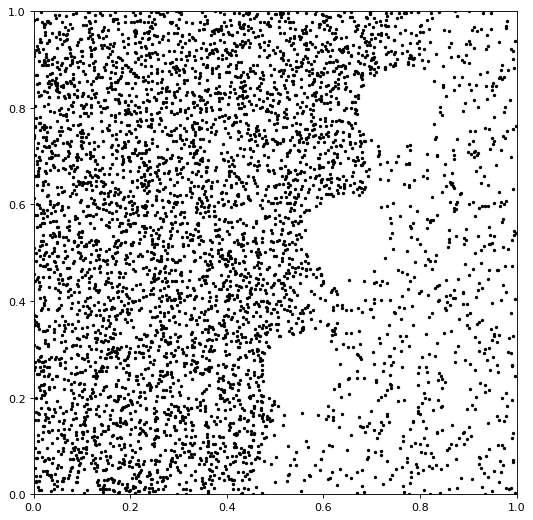

Number of points: 5004
Execution time: 0.2314143180847168 seconds


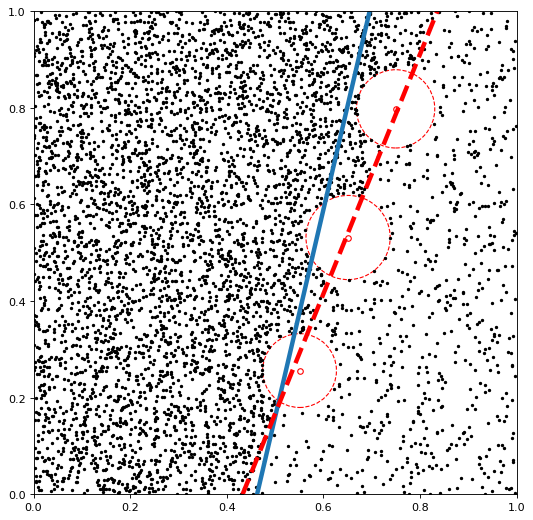

The error squared is given by: 2.05e-02
The L2 error is given by: 6.04e-02
Execution time: 3.2728946208953857 seconds


<Figure size 640x640 with 0 Axes>

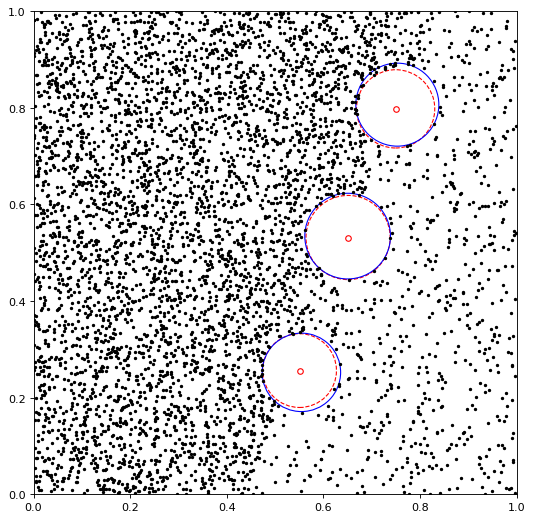

3 particles have been detected.
Execution time: 1.7190682888031006 seconds


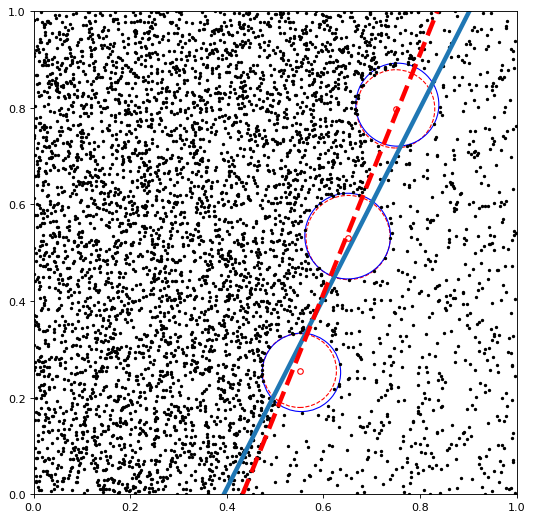

The error squared is given by: 5.89e-03
The L2 error is given by: 2.80e-02
The error has been improved by 2.1528864307379854 times
Execution time: 3.1987946033477783 seconds


In [2]:
from ipywidgets import widgets, HBox, VBox
from IPython.display import display
from pointProcesses import PointProcess
import numpy as np
from IPython import display as dp

layout = widgets.Layout(width='340px', height='40px')  # set width and height
style = {'description_width': 'initial'}

x_max_input = widgets.BoundedIntText(
    value=1,
    min=1,
    max=5,
    step=1,
    description='X Max',
    disabled=False
)

y_max_input = widgets.BoundedIntText(
    value=1,
    min=1,
    max=5,
    step=1,
    description='Y Max',
    disabled=False
)

radii_mean_slider = widgets.FloatSlider(
    value=0.08,
    min=0.06,
    max=0.1,
    step=0.005,
    description='Particles Radii Mean',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style=style,
    layout={'width': '700px'},
    readout_format='.2f',
)

radii_std_slider = widgets.FloatSlider(
    value=0.005,
    min=0.000,
    max=0.010,
    step=0.001,
    description='Particles Radii Standard Deviation',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style=style,
    layout={'width': '700px'},
    readout_format='.3f',
)

rho_slider = widgets.FloatSlider(
    value=0.3,
    min=0.1,
    max=1,
    step=0.1,
    description='Rho',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style=style,
    layout={'width': '700px'},
    readout_format='.1f',
)

N_slider = widgets.FloatSlider(
    value=5000,
    min=1000,
    max=100000,
    step=1000,
    description='Mean Number of Points',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style=style,
    layout={'width': '700px'},
    readout_format='.0f',
)

precision_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    step=1,
    description='Precision boundary finder',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style=style,
    layout={'width': '700px'},
    readout_format='.0f',
)

divisions_slider = widgets.IntSlider(
    value=20,
    min=5,
    max=50,
    step=5,
    description='Number of Divisions',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style=style,
    layout={'width': '700px'},
    readout_format='.0f',
)

iterations_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    step=1,
    description='Number of Iterations',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style=style,
    layout={'width': '700px'},
    readout_format='.0f',
)

add_particles_switch = widgets.Checkbox(
    value=False,
    description='Add Particles',
    disabled=False,
    indent=False
)

show_anchor_points_switch = widgets.Checkbox(
    value=False,
    description='Show Anchor Points',
    disabled=False,
    indent=False
)

generate_poisson_process = widgets.Button(
    description='Generate Poisson Point Process',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    layout=layout,
    icon='forward'
)

clear = widgets.Button(
    description='Clear Output',
    disabled=False,
    button_style='danger',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    layout=layout,
    icon='trash'
)

approximate_particles_button = widgets.Button(
    description='Approximate Particles',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    layout=layout,
    icon='calculator'
)

find_bounds_button = widgets.Button(
    description='Find Bounds',
    disabled=False,
    button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    layout=layout,
    icon='search'
)

# display(x_max_input)
# display(y_max_input)
display(radii_mean_slider)
display(radii_std_slider)
display(rho_slider)
display(N_slider)
display(precision_slider)
display(divisions_slider)
display(iterations_slider)
display(add_particles_switch)
display(show_anchor_points_switch)
display(HBox([VBox([generate_poisson_process, find_bounds_button]), VBox([approximate_particles_button, clear])]))

poisson = 0


def on_button_clicked(b):
    global poisson
    poisson = PointProcess(
        width=x_max_input.value,
        height=y_max_input.value,
        bottom_seperation_point=np.random.uniform(0, x_max_input.value),
        top_seperation_point=np.random.uniform(0, x_max_input.value),
        add_particles=add_particles_switch.value,
        radii_mean=radii_mean_slider.value,
        radii_std=radii_std_slider.value)

    poisson.generate_points(
        n=N_slider.value,
        rho=rho_slider.value,
        plot=True,
        show_info=True)


def on_approximate_particles_button(b):
    poisson.estimate_particles(
        divisions=divisions_slider.value,
        iterations=iterations_slider.value,
        plot=True,
        show_anchor_points=show_anchor_points_switch.value,
        show_info=True)


def on_find_bounds_button(b):
    poisson.find_bounds(precision=precision_slider.value,
                        anim=False,
                        plot=True,
                        plot_true_bound=True,
                        plot_true_particles=True,
                        plot_particles_approximated=True,
                        show_info=True)


def clear_output(b):
    dp.clear_output(wait=False)
    display(radii_mean_slider)
    display(radii_std_slider)
    display(rho_slider)
    display(N_slider)
    display(precision_slider)
    display(divisions_slider)
    display(iterations_slider)
    display(add_particles_switch)
    display(show_anchor_points_switch)
    display(HBox([VBox([generate_poisson_process, find_bounds_button]), VBox([approximate_particles_button, clear])]))


generate_poisson_process.on_click(on_button_clicked)
clear.on_click(clear_output)
approximate_particles_button.on_click(on_approximate_particles_button)
find_bounds_button.on_click(on_find_bounds_button)

